In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Generate 800 data points (X) and labels (Y)synthetic data with 2 centers
X, y = make_blobs(
    n_samples=800,      #total points
    centers=2,          #number of classes (2 blobs = binary classification)
    n_features=2,       #each point has 2 coordinates [x1, x2]
    random_state=42)    #for reproducibility

In [5]:
#reshape labels to a column vector and make sure they are floats
y = y.reshape(-1, 1).astype(np.float32)

In [6]:
#Train/ val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

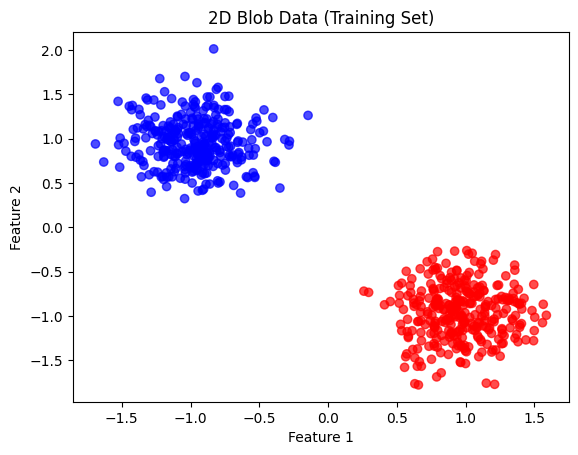

((640, 2), (640, 1), (160, 2), (160, 1))

In [8]:
#standardize using the training set parameters
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

#plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7)
plt.title("2D Blob Data (Training Set)")    
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X_train.shape, y_train.shape, X_val.shape, y_val.shape

In [9]:
#Model Architecture
def he_init(fan_in, fan_out):   
    """ He initialization for weights """
    std = np.sqrt(2.0 / fan_in)
    return np.random.normal(0, std, size=(fan_in, fan_out))

def init_params(n_in=2, n_hidden=16, n_out=1):
    """ Initialize weights and biases for a 2-layer NN """
    params = {}                                 #initialize a dictionary to store the parameters
    params['W1'] = he_init(n_in, n_hidden)      #weights for input to hidden layer
    params['b1'] = np.zeros((1, n_hidden))      #biases for hidden layer
    params['W2'] = he_init(n_hidden, n_out)     #weights for hidden to output layer
    params['b2'] = np.zeros((1, n_out))         #biases for output layer
    return params

In [10]:
#Check the initialization
params = init_params()      
for key, value in params.items():
    print(f"{key}: {value.shape}")


W1: (2, 16)
b1: (1, 16)
W2: (16, 1)
b2: (1, 1)


In [ ]:
#
def relu(Z):
    """ ReLU activation function """
    return np.maximum(0, Z)

def sigmoid(Z):
    """ Sigmoid activation function """
    return 1 / (1 + np.exp(-Z))

#Forward pass & loss metrics
def forward_pass(X, params):
    """ Forward pass through the network """
    Z1 = X @ params['W1'] + params['b1']
    A1 = relu(Z1)
    Z2 = A1 @ params['W2'] + params['b2']
    return Z2
def compute_loss(y_true, y_pred):
    """ Compute Mean Squared Error loss """
    m = y_true.shape[0]
    loss = np.mean((y_true - y_pred) ** 2)
    return loss 
#Test forward pass and loss
y_pred = forward_pass(X_train, params)
loss = compute_loss(y_train, y_pred)
print(f"Loss: {loss}")

def accuracy(y_true, y_pred):
    """ Compute accuracy for binary classification """
    y_pred_labels = (y_pred >= 0.5).astype(np.float32)
    acc = np.mean(y_true == y_pred_labels)
    return acc

Loss: 5.335386265050289
